In [9]:
#Module for testing KNearest classifier and regression classes

import pandas as pd 
import numpy as np 


from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV


#Importing my classifier class
import KNearest
from KNearest import KNearestClassifier, KNearestRegressor

from sklearn.datasets import make_classification
from sklearn.datasets import make_regression 

In [6]:
#Classification benchmark
kfold = KFold(n_splits= 5)

#Mae module
df = pd.read_csv("abalone_m.csv")
target = "Rings"
seed = 42
y = df.pop(target)
X = df

def kclass_bench(X,y):
    #Rescaling
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

    #Find the optimal k first
    kn = KNearestClassifier()
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
    train = pd.concat((X_train, y_train), axis =1)
    print("Finding optimal k...")
    k_opt = kn.k_optimal(train, X_test,y_test, target)[0]
    print("Optimal k:", k_opt)
    #Crossval scoring with n = 5
    scores_mae = []
    i = 1
    while i <=5:
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
        train = pd.concat((X_train, y_train), axis =1)
        y_pred = kn.predict(train, X_test, target, k = k_opt)
        scores_mae.append(kn.scorer(y_test, y_pred))
        i +=1
    print("Cv Score mae:", np.array(scores_mae).mean()) 
    #Sklearn
    neigh = KNeighborsClassifier(n_neighbors= k_opt)
    neigh.fit(X, y)
    #KNeighborsClassifier(...)
    cv_results = cross_val_score(estimator = neigh, X = X,y = y , scoring = "accuracy", cv = kfold)
    print("SKLearn scores:", cv_results.mean())
   


kclass_bench(X,y)



TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [8]:
##Regression benchmark and testing

kfold = KFold(n_splits= 5)

#Mae module
df2 = pd.read_csv("Fish.csv")
df2 = pd.get_dummies(df2, drop_first = True)
target = "Weight"
seed = 42
y = df2.pop(target)
X = df2

def kreg_bench(X,y):
    #Rescaling
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

    #Find the optimal k first
    kn = KNearestRegressor()
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
    train = pd.concat((X_train, y_train), axis =1)
    print("Finding optimal k...")
    k_opt = kn.k_optimal(train, X_test,y_test, target)[0]
    print("Optimal k:", k_opt)
    #Crossval scoring
    scores_mae = []
    i = 1
    while i <=5:
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
        train = pd.concat((X_train, y_train), axis =1)
        y_pred = kn.predict(train, X_test, target, k = k_opt)
        scores_mae.append(kn.scorer(y_test, y_pred))
        i +=1
    print("Cv Score mae:", np.array(scores_mae).mean()) 
    #Sklearn
    print("Getting sklearn estimate...")
    neigh = KNeighborsRegressor(n_neighbors= k_opt)
    neigh.fit(X, y)
    cv_results = cross_val_score(estimator = neigh, X = X,y = y , scoring = "neg_mean_squared_error", cv = kfold)
    
    params = {"n_neighbors": np.arange(1,50),
                "leaf_size" : np.arange(1,50),
                "weights": ["uniform", "distance"],
                "metric": ["euclidean", "manhattan"]}
                    
    gs = GridSearchCV(neigh, param_grid= params, cv = 5,scoring = "neg_mean_squared_error",verbose= 0)
    gs.fit(X, y)
    print(-1 * gs.best_score_)
    print(gs.best_estimator_)
    print(gs.best_params_)
    
    print("SKLearn scores:", -1 * cv_results.mean())
    
   


kreg_bench(X,y)





Finding optimal k...
Optimal k: 22
Cv Score mae: 42216.29543491736
Getting sklearn estimate...
19361.437428593657
KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='distance')
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
SKLearn scores: 32601.90535202279


In [17]:
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=150, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

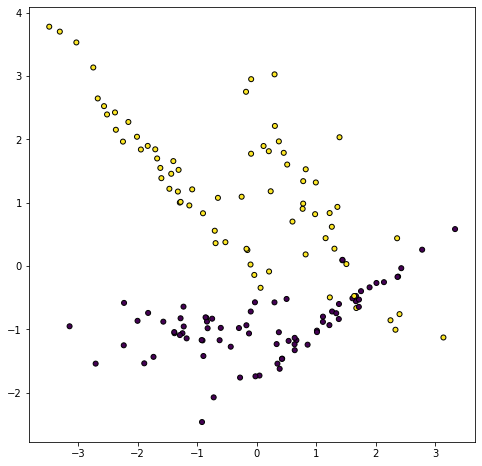

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], marker = "o",
            c = y,  s=25, edgecolor='k')

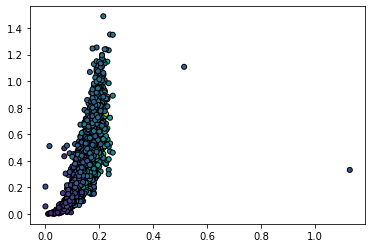

In [25]:
df = pd.read_csv("abalone_m.csv")
target = "Rings"
seed = 42
y = np.array(df.pop(target))
X = np.array(df)

plt.scatter(X[:,2], X[:,4], marker = "o",
            c = y,  s=25, edgecolor='k')
